In [1]:
import matplotlib.pyplot as plt
import random
import timeit


### 기본적인 퀵소트

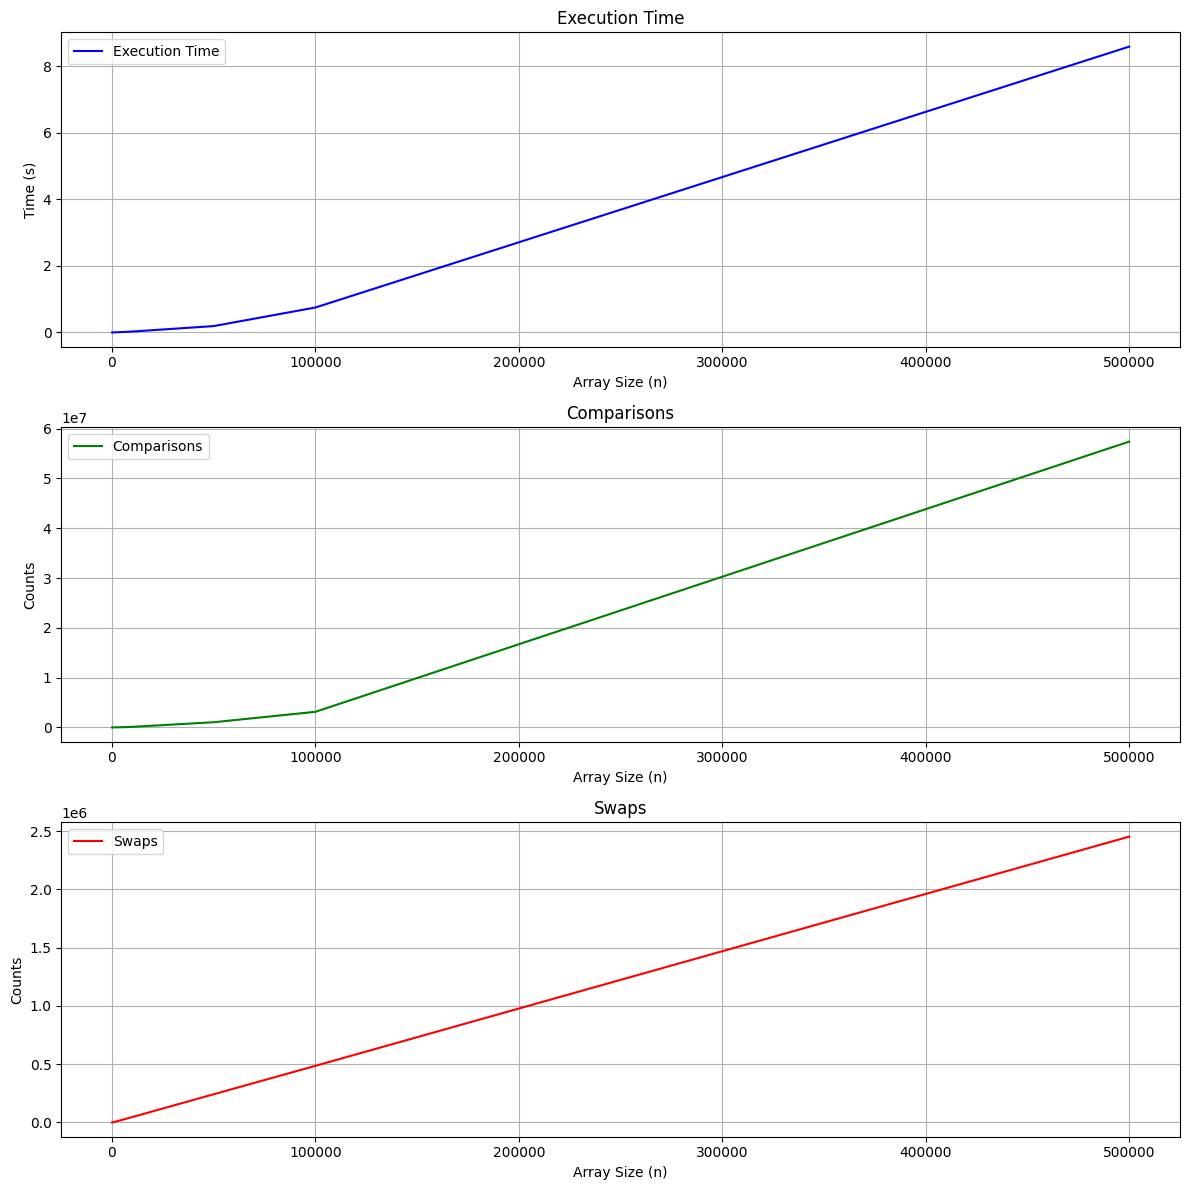

In [2]:
def quick_sort(A, left, right):
    global Qc, Qs
    if left >= right: return
    pivot = A[left]
    i, j = left, right
    while i < j:
        while i < j and A[j] >= pivot:
            Qc += 1
            j -= 1
        if i < j:
            Qs += 1
            A[i] = A[j]
            i += 1
        while i < j and A[i] <= pivot:
            Qc += 1
            i += 1
        if i < j:
            Qs += 1
            A[j] = A[i]
            j -= 1
    A[i] = pivot
    quick_sort(A, left, i - 1)
    quick_sort(A, i + 1, right)


def check_sorted(A):
    for i in range(n - 1):
        if A[i] > A[i + 1]: return False
    return True


Qc, Qs, = 0, 0

n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
time_results = []
comparison_results = []
swap_results = []
total_operation_results = []

for n in n_values:
    A = [random.randint(-1000, 1000) for _ in range(n)]

    Qc, Qs = 0, 0
    elapsed_time = timeit.timeit("quick_sort(A, 0, n-1)", globals=globals(), number=1)
    assert check_sorted(A)

    time_results.append(elapsed_time)
    comparison_results.append(Qc)
    swap_results.append(Qs)
    total_operation_results.append(Qc + Qs)

plt.figure(figsize=(12, 12))

# Execution Time
plt.subplot(3, 1, 1)
plt.plot(n_values, time_results, label='Execution Time', color='blue')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Execution Time')
plt.grid()

# Comparisons
plt.subplot(3, 1, 2)
plt.plot(n_values, comparison_results, label='Comparisons', color='green')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Comparisons')
plt.grid()

# Swaps
plt.subplot(3, 1, 3)
plt.plot(n_values, swap_results, label='Swaps', color='red')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Swaps')
plt.grid()

plt.tight_layout()
plt.show()

### 추가점수 1
- 경우에 따라서 10과 40 사이의 상수 K에 대해서, K개 이하가 되면 분할을 몀취고, insertion sort로 정렬을 해본다.

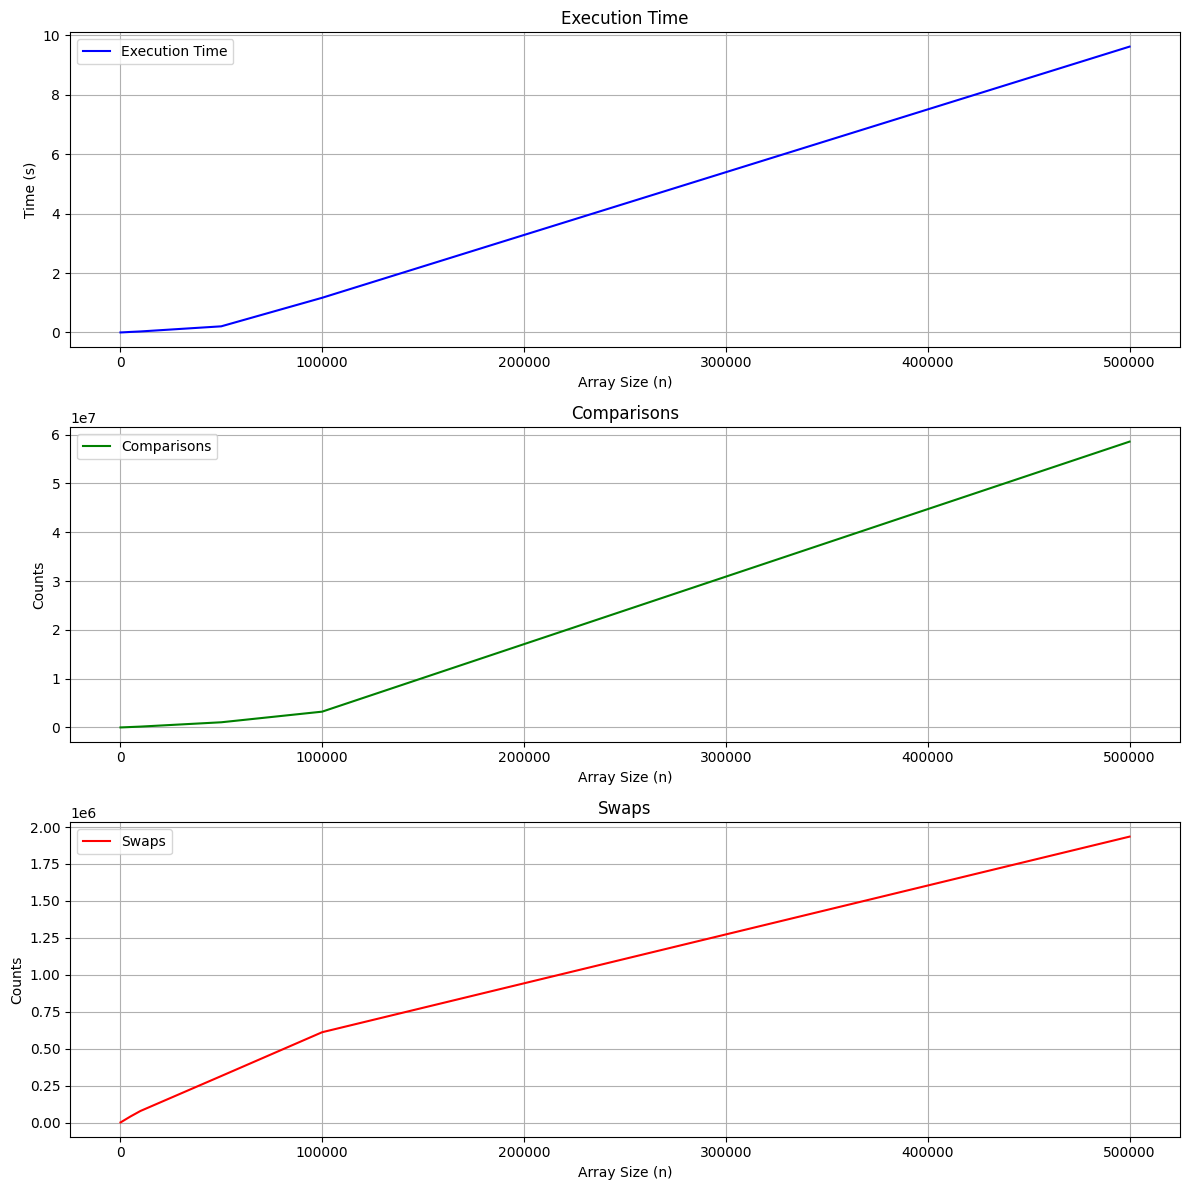

In [3]:
def hybrid_quick_sort(arr, low, high):
    global Qc, Qs

    if low < high:
        if 10 <= high - low + 1 <= 40:
            insertion_sort(arr, low, high)
        else:
            pivot_index = partition(arr, low, high)
            hybrid_quick_sort(arr, low, pivot_index - 1)
            hybrid_quick_sort(arr, pivot_index + 1, high)


def partition(arr, low, high):
    global Qc, Qs

    pivot = arr[low]
    i = low + 1
    j = high

    while True:
        while i <= j and arr[i] <= pivot:
            Qc += 1
            i += 1
        while i <= j and arr[j] >= pivot:
            Qc += 1
            j -= 1
        if i <= j:
            arr[i], arr[j] = arr[j], arr[i]
            Qs += 1
        else:
            break

    arr[low], arr[j] = arr[j], arr[low]
    Qs += 1
    return j


def insertion_sort(arr, low, high):
    global Qc, Qs

    for i in range(low + 1, high + 1):
        key = arr[i]
        j = i - 1
        while j >= low:
            Qc += 1
            if arr[j] > key:
                arr[j + 1] = arr[j]
                Qs += 1
                j -= 1
            else:
                break
        arr[j + 1] = key
        Qs += 1


def check_sorted(A):
    for i in range(n - 1):
        if A[i] > A[i + 1]: return False
    return True


Qc, Qs, = 0, 0

n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
time_results = []
comparison_results = []
swap_results = []
total_operation_results = []

for n in n_values:
    A = [random.randint(-1000, 1000) for _ in range(n)]

    Qc, Qs = 0, 0
    elapsed_time = timeit.timeit("hybrid_quick_sort(A, 0, n-1)", globals=globals(), number=1)
    assert check_sorted(A)

    time_results.append(elapsed_time)
    comparison_results.append(Qc)
    swap_results.append(Qs)
    total_operation_results.append(Qc + Qs)

plt.figure(figsize=(12, 12))

# Execution Time
plt.subplot(3, 1, 1)
plt.plot(n_values, time_results, label='Execution Time', color='blue')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Execution Time')
plt.grid()

# Comparisons
plt.subplot(3, 1, 2)
plt.plot(n_values, comparison_results, label='Comparisons', color='green')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Comparisons')
plt.grid()

# Swaps
plt.subplot(3, 1, 3)
plt.plot(n_values, swap_results, label='Swaps', color='red')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Swaps')
plt.grid()

plt.tight_layout()
plt.show()



### 추가점수 2
- 적당한 K개가 남을 때까지만 분할한 후, 따로 insertation sort등으로 정렬을 하지 않는다면, 전체 값이 완전히 정렬되지는 않지만 대부분 정렬이 된 상태가 된다. 완전이 정렬하기 위해 전체 값들을 대상으로 insertation sort를 적용할 수도 있다.
    - 추가점수 1에서 범위를 단정한 것과 다르게, 추가점수 2는 그 범위를 단정짓지 않았다는 점에서 수행시간이나 비교횟수, 교환 및 이동 횟수는 추가점수 1에서의 경우와 유사할 것이다.

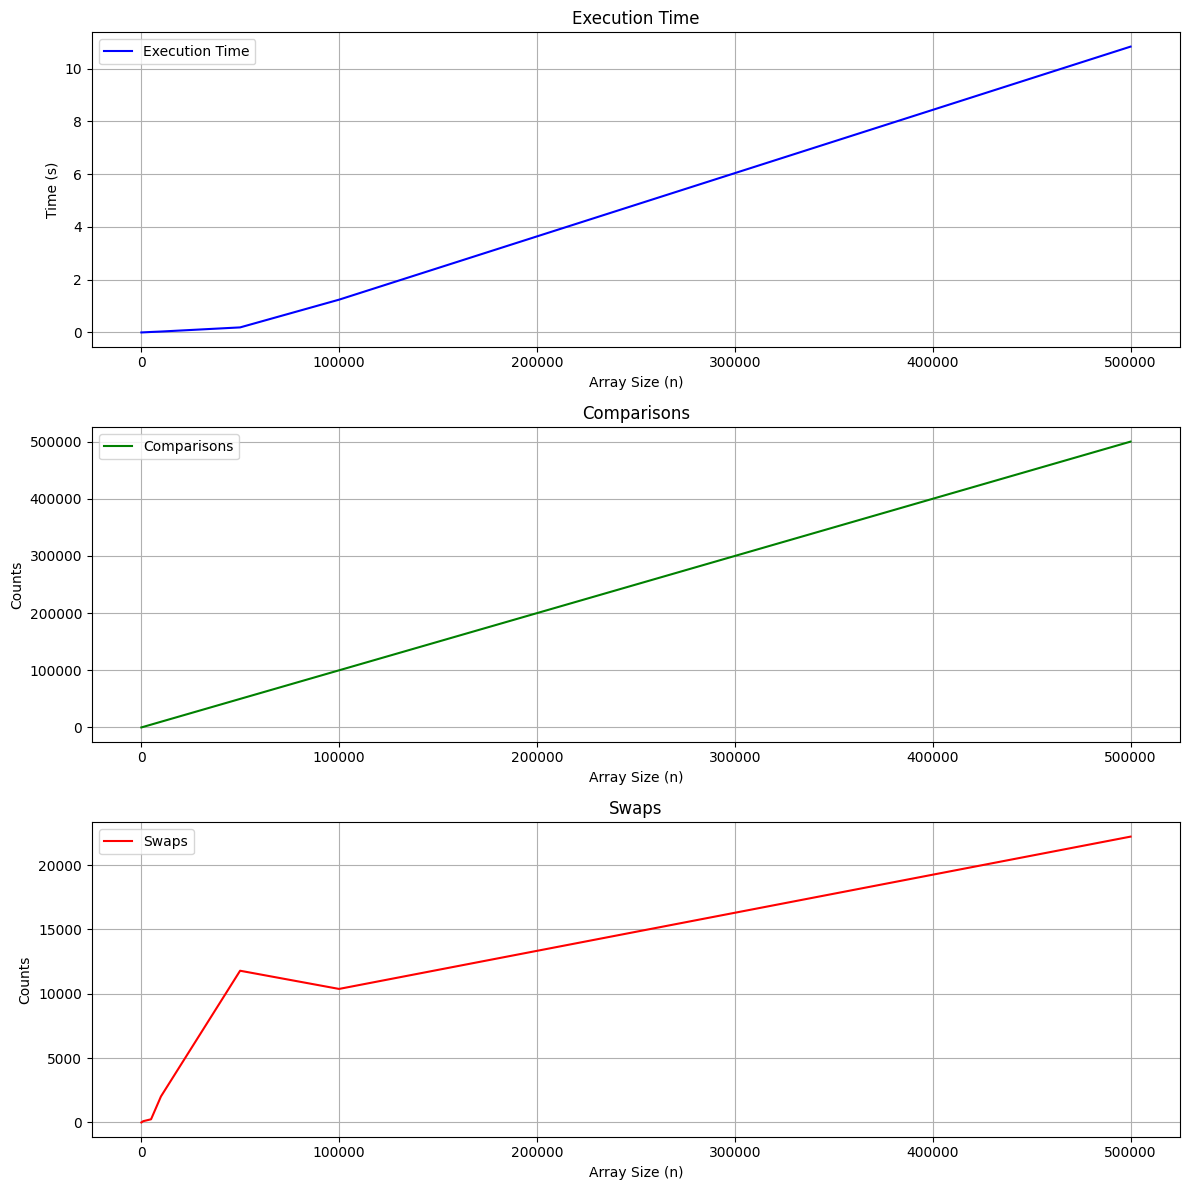

In [4]:
def hybrid_quick_sort_2(arr, low, high, K):
    global Q2c, Q2s

    if low < high:
        if high - low + 1 <= K:
            insertion_sort_2(arr, low, high)
        else:
            pivot_index = partition_2(arr, low, high)
            hybrid_quick_sort(arr, low, pivot_index - 1)
            hybrid_quick_sort(arr, pivot_index + 1, high)


def partition_2(arr, low, high):
    global Q2c, Q2s

    pivot = arr[low]
    i = low + 1
    j = high

    while True:
        while i <= j and arr[i] <= pivot:
            Q2c += 1
            i += 1
        while i <= j and arr[j] >= pivot:
            Q2c += 1
            j -= 1
        if i <= j:
            arr[i], arr[j] = arr[j], arr[i]
            Q2s += 1
        else:
            break

    arr[low], arr[j] = arr[j], arr[low]
    Q2s += 1
    return j


# insertion sort는 기본적인 insertion sort의 방식을 활용한다.
def insertion_sort_2(arr, low, high):
    global Q2c, Q2s

    for i in range(low + 1, high + 1):
        key = arr[i]
        j = i - 1
        while j >= low:
            Q2c += 1
            if arr[j] > key:
                arr[j + 1] = arr[j]
                Q2s += 1
                j -= 1
            else:
                break
        arr[j + 1] = key
        Q2s += 1


Q2c, Q2s = 0, 0

n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
K = random.randint(10, 40)
time_results = []
comparison_results = []
swap_results = []
total_operation_results = []

for n in n_values:
    A = [random.randint(-1000, 1000) for _ in range(n)]

    Q2c, Q2s = 0, 0
    elapsed_time = timeit.timeit("hybrid_quick_sort_2(A, 0, n-1, K)", globals=globals(), number=1)
    assert check_sorted(A)

    time_results.append(elapsed_time)
    comparison_results.append(Q2c)
    swap_results.append(Q2s)
    total_operation_results.append(Q2c + Q2s)

plt.figure(figsize=(12, 12))

# Execution Time
plt.subplot(3, 1, 1)
plt.plot(n_values, time_results, label='Execution Time', color='blue')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Execution Time')
plt.grid()

# Comparisons
plt.subplot(3, 1, 2)
plt.plot(n_values, comparison_results, label='Comparisons', color='green')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Comparisons')
plt.grid()

# Swaps
plt.subplot(3, 1, 3)
plt.plot(n_values, swap_results, label='Swaps', color='red')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Swaps')
plt.grid()

plt.tight_layout()
plt.show()



### 기본적인 머지 소트

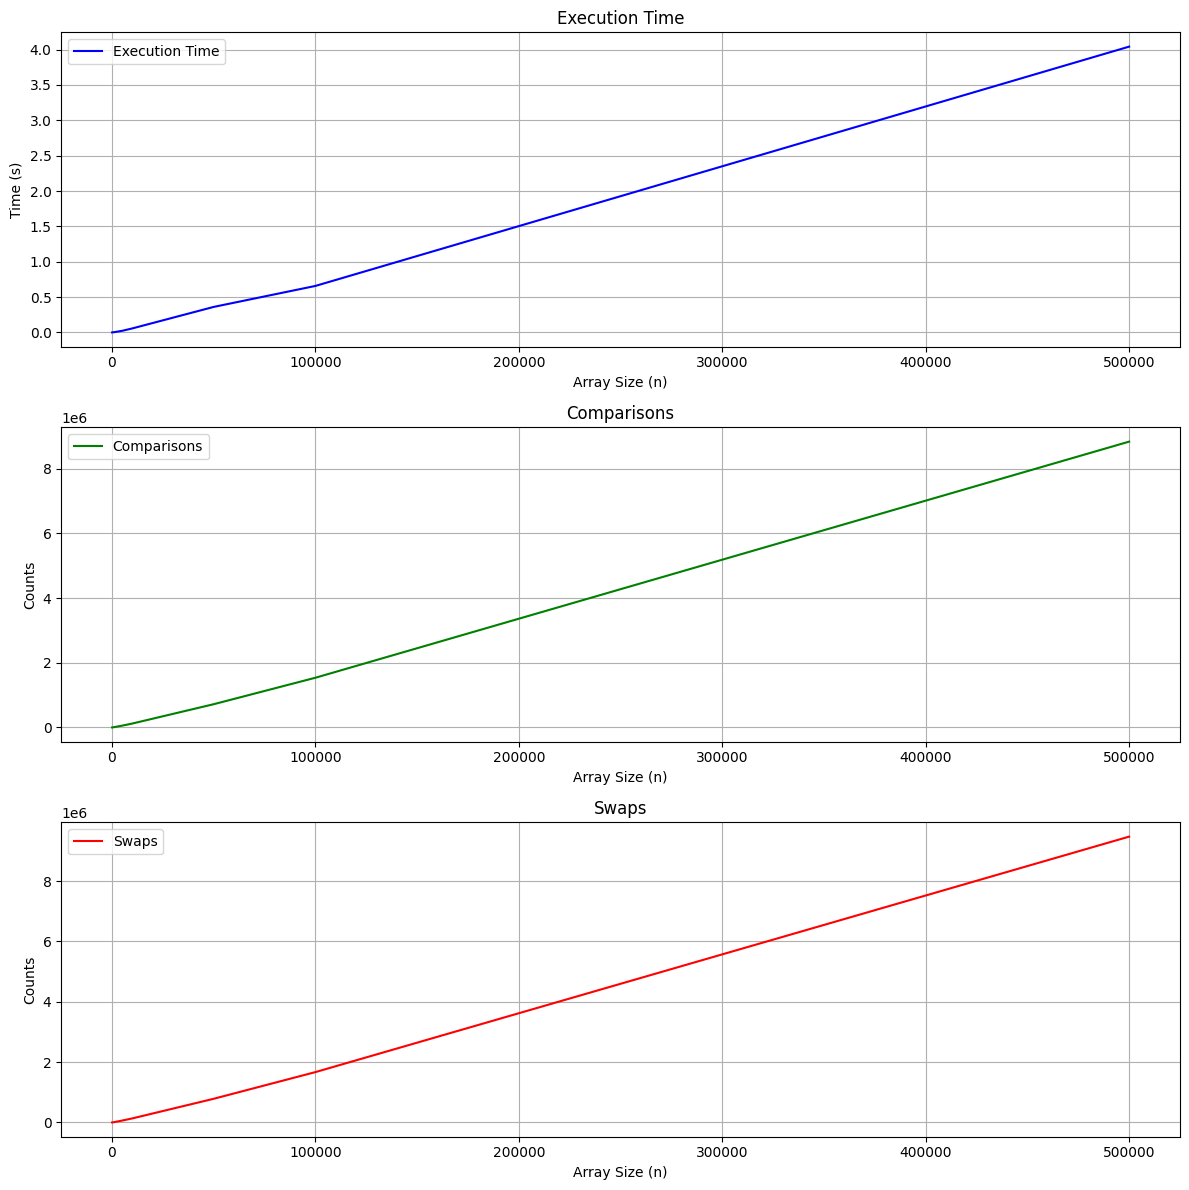

In [5]:
def merge_sort(A, left, right):
    global Mc, Ms
    if left >= right: return
    mid = (left + right) // 2
    merge_sort(A, left, mid)
    merge_sort(A, mid + 1, right)
    B = []
    i, j = left, mid + 1
    while i <= mid and j <= right:
        Mc += 1
        if A[i] <= A[j]:
            B.append(A[i])
            i += 1
        else:
            B.append(A[j])
            j += 1
    while i <= mid:
        B.append(A[i])
        i += 1
    while j <= right:
        B.append(A[j])
        j += 1
    for i in range(left, right + 1):
        Ms += 1
        A[i] = B[i - left]


def check_sorted(A):
    for i in range(n - 1):
        if A[i] > A[i + 1]: return False
    return True

Mc, Ms, = 0, 0

n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
time_results = []
comparison_results = []
swap_results = []
total_operation_results = []

for n in n_values:
    A = [random.randint(-1000, 1000) for _ in range(n)]

    Mc, Ms = 0, 0
    elapsed_time = timeit.timeit("merge_sort(A, 0, n-1)", globals=globals(), number=1)
    assert check_sorted(A)

    time_results.append(elapsed_time)
    comparison_results.append(Mc)
    swap_results.append(Ms)
    total_operation_results.append(Mc + Ms)

plt.figure(figsize=(12, 12))

# Execution Time
plt.subplot(3, 1, 1)
plt.plot(n_values, time_results, label='Execution Time', color='blue')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Execution Time')
plt.grid()

# Comparisons
plt.subplot(3, 1, 2)
plt.plot(n_values, comparison_results, label='Comparisons', color='green')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Comparisons')
plt.grid()

# Swaps
plt.subplot(3, 1, 3)
plt.plot(n_values, swap_results, label='Swaps', color='red')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Swaps')
plt.grid()

plt.tight_layout()
plt.show()



### 3-way 머지 소트
- 왼쪽 반과 오른쪽 반으로 나누지 않고, 3등분해서 재귀적으로 정렬한 후 merge 하는 3-way-merge sort를 구현하시오.

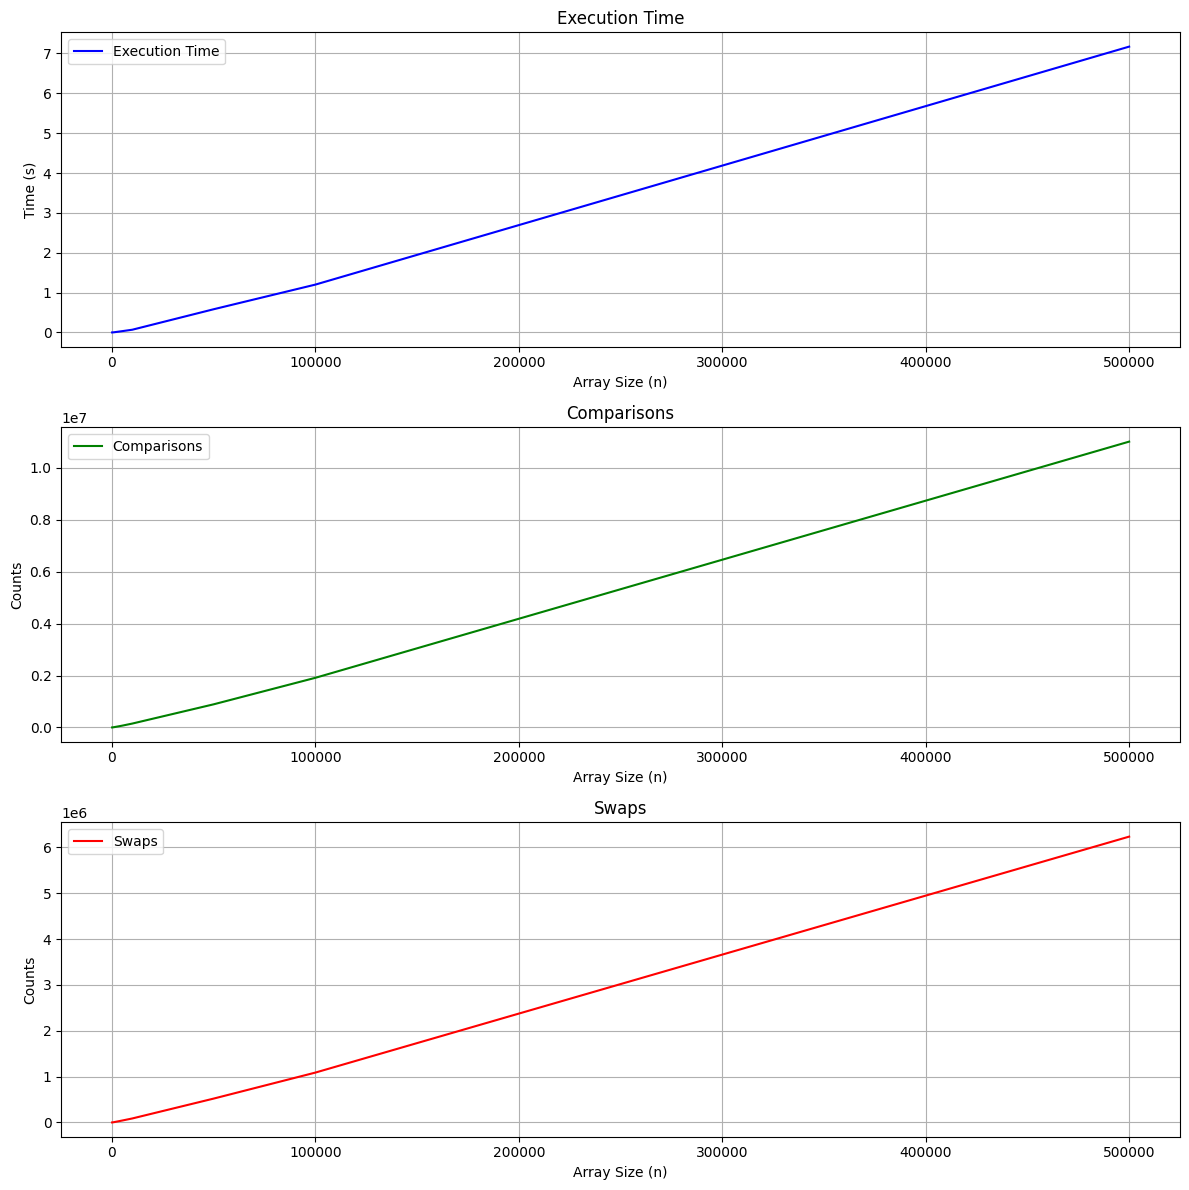

In [7]:
def three_way_merge_sort(A, left, right):
    global M1c, M1s
    if left >= right: return
    mid1 = left + (right - left) // 3
    mid2 = left + (right - left) // 3 * 2
    three_way_merge_sort(A, left, mid1)
    three_way_merge_sort(A, mid1 + 1, mid2)
    three_way_merge_sort(A, mid2 + 1, right)
    B = []
    i, j, k = left, mid1 + 1, mid2 + 1
    while i <= mid1 and j <= mid2 and k <= right:
        M1c += 2
        if A[i] <= A[j]:
            if A[i] <= A[k]:
                B.append(A[i])
                i += 1
            else:
                B.append(A[k])
                k += 1
        else:
            if A[j] <= A[k]:
                B.append(A[j])
                j += 1
            else:
                B.append(A[k])
                k += 1
    while i <= mid1 and j <= mid2:
        M1c += 1
        if A[i] <= A[j]:
            B.append(A[i])
            i += 1
        else:
            B.append(A[j])
            j += 1
    while i <= mid1 and k <= right:
        M1c += 1
        if A[i] <= A[k]:
            B.append(A[i])
            i += 1
        else:
            B.append(A[k])
            k += 1
    while j <= mid2 and k <= right:
        M1c += 1
        if A[j] <= A[k]:
            B.append(A[j])
            j += 1
        else:
            B.append(A[k])
            k += 1
    while i <= mid1:
        B.append(A[i])
        i += 1
    while j <= mid2:
        B.append(A[j])
        j += 1
    while k <= right:
        B.append(A[k])
        k += 1
    for i in range(left, right + 1):
        M1s += 1
        A[i] = B[i - left]


M1c, M1s, = 0, 0
n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
time_results = []
comparison_results = []
swap_results = []
total_operation_results = []

for n in n_values:
    A = [random.randint(-1000, 1000) for _ in range(n)]

    M1c, M1s = 0, 0
    elapsed_time = timeit.timeit("three_way_merge_sort(A, 0, n-1)", globals=globals(), number=1)
    assert check_sorted(A)

    time_results.append(elapsed_time)
    comparison_results.append(M1c)
    swap_results.append(M1s)
    total_operation_results.append(M1c + M1s)

plt.figure(figsize=(12, 12))

# Execution Time
plt.subplot(3, 1, 1)
plt.plot(n_values, time_results, label='Execution Time', color='blue')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Execution Time')
plt.grid()

# Comparisons
plt.subplot(3, 1, 2)
plt.plot(n_values, comparison_results, label='Comparisons', color='green')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Comparisons')
plt.grid()

# Swaps
plt.subplot(3, 1, 3)
plt.plot(n_values, swap_results, label='Swaps', color='red')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Swaps')
plt.grid()

plt.tight_layout()
plt.show()



### 기본적인 힙 소트

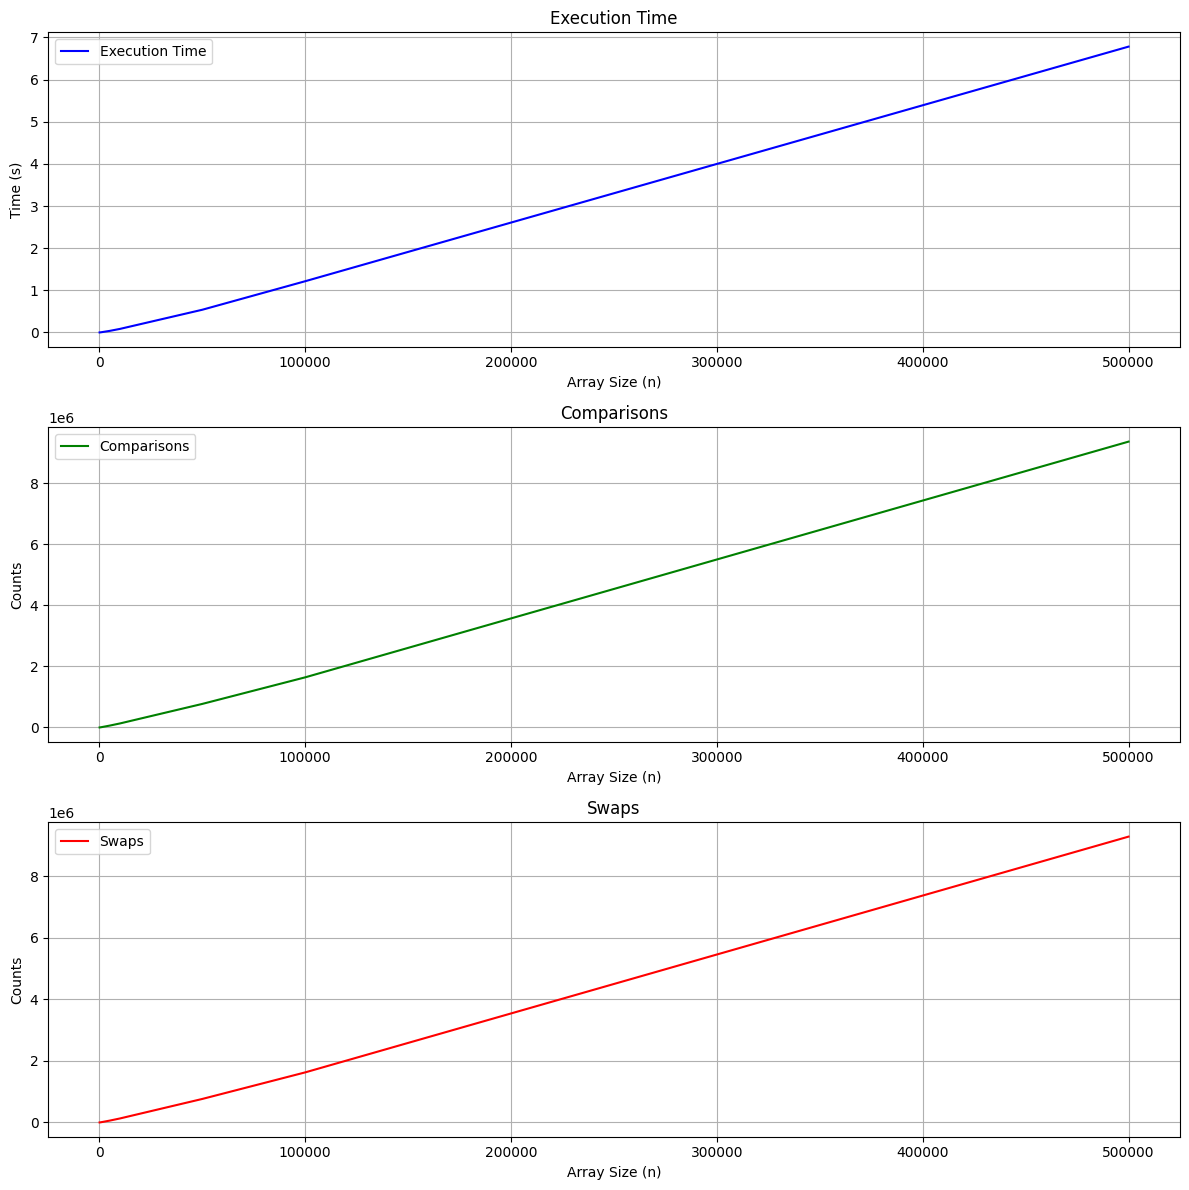

In [8]:
def heap_sort(A):
    global Hc, Hs
    n = len(A)
    for i in range(n):
        j = i
        while j > 0:
            Hc += 1
            if A[j] <= A[(j - 1) // 2]: break
            Hs += 1
            A[j], A[(j - 1) // 2] = A[(j - 1) // 2], A[j]
            j = (j - 1) // 2
    for i in range(n - 1, 0, -1):
        Hs += 1
        A[0], A[i] = A[i], A[0]
        j = 0
        while j * 2 + 1 < i:
            Hc += 1
            k = j * 2 + 1
            if k + 1 < i and A[k] < A[k + 1]: k += 1
            if A[j] >= A[k]: break
            Hs += 1
            A[j], A[k] = A[k], A[j]
            j = k


def check_sorted(A):
    for i in range(n - 1):
        if A[i] > A[i + 1]: return False
    return True

Hc, Hs, = 0, 0
n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]
time_results = []
comparison_results = []
swap_results = []
total_operation_results = []

for n in n_values:
    A = [random.randint(-1000, 1000) for _ in range(n)]

    Hc, Hs = 0, 0
    elapsed_time = timeit.timeit("heap_sort(A)", globals=globals(), number=1)
    assert check_sorted(A)

    time_results.append(elapsed_time)
    comparison_results.append(Hc)
    swap_results.append(Hs)
    total_operation_results.append(Hc + Hs)

plt.figure(figsize=(12, 12))

# Execution Time
plt.subplot(3, 1, 1)
plt.plot(n_values, time_results, label='Execution Time', color='blue')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Execution Time')
plt.grid()

# Comparisons
plt.subplot(3, 1, 2)
plt.plot(n_values, comparison_results, label='Comparisons', color='green')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Comparisons')
plt.grid()

# Swaps
plt.subplot(3, 1, 3)
plt.plot(n_values, swap_results, label='Swaps', color='red')
plt.xlabel('Array Size (n)')
plt.ylabel('Counts')
plt.legend()
plt.title('Swaps')
plt.grid()

plt.tight_layout()
plt.show()



### Tim Sort
- 파이썬의 Tim sort 수행 시간을 다른 세 가지 알고리즘의 수행 시간과 비교해보세요.

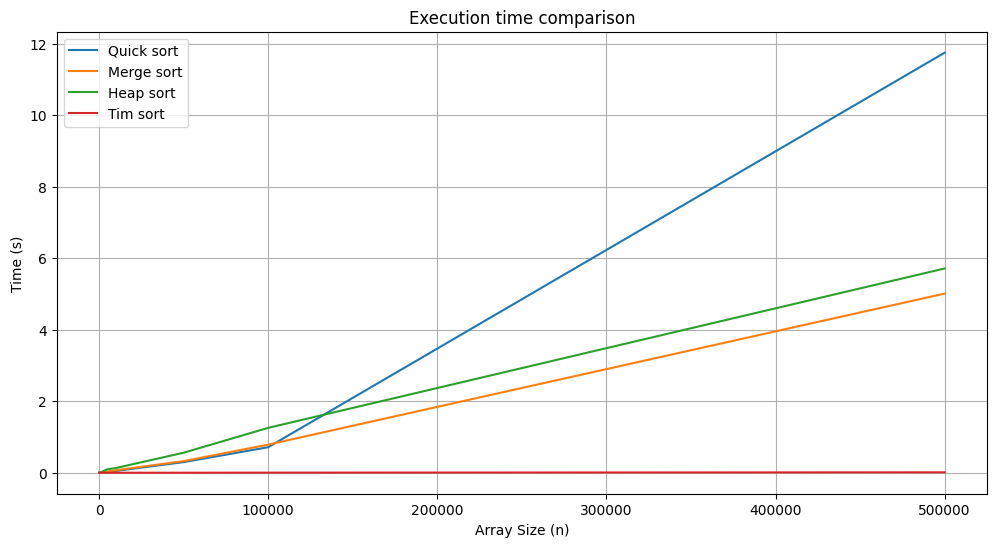

In [9]:
import random
import time
import matplotlib.pyplot as plt


def quick_sort(A, left, right):
    global Qc, Qs
    if left >= right: return
    pivot = A[left]
    i, j = left, right
    while i < j:
        while i < j and A[j] >= pivot:
            Qc += 1
            j -= 1
        if i < j:
            Qs += 1
            A[i] = A[j]
            i += 1
        while i < j and A[i] <= pivot:
            Qc += 1
            i += 1
        if i < j:
            Qs += 1
            A[j] = A[i]
            j -= 1
    A[i] = pivot
    quick_sort(A, left, i - 1)
    quick_sort(A, i + 1, right)


def merge_sort(A, left, right):
    global Mc, Ms
    if left >= right: return
    mid = (left + right) // 2
    merge_sort(A, left, mid)
    merge_sort(A, mid + 1, right)
    B = []
    i, j = left, mid + 1
    while i <= mid and j <= right:
        Mc += 1
        if A[i] <= A[j]:
            B.append(A[i])
            i += 1
        else:
            B.append(A[j])
            j += 1
    while i <= mid:
        B.append(A[i])
        i += 1
    while j <= right:
        B.append(A[j])
        j += 1
    for i in range(left, right + 1):
        Ms += 1
        A[i] = B[i - left]

def heap_sort(A):
    global Hc, Hs
    n = len(A)
    for i in range(n):
        j = i
        while j > 0:
            Hc += 1
            if A[j] <= A[(j - 1) // 2]: break
            Hs += 1
            A[j], A[(j - 1) // 2] = A[(j - 1) // 2], A[j]
            j = (j - 1) // 2
    for i in range(n - 1, 0, -1):
        Hs += 1
        A[0], A[i] = A[i], A[0]
        j = 0
        while j * 2 + 1 < i:
            Hc += 1
            k = j * 2 + 1
            if k + 1 < i and A[k] < A[k + 1]: k += 1
            if A[j] >= A[k]: break
            Hs += 1
            A[j], A[k] = A[k], A[j]
            j = k

# 아래 코드는 바꾸지 말 것!
# 직접 실행해보면, 어떤 값이 출력되는지 알 수 있음


def check_sorted(A):
    for i in range(n - 1):
        if A[i] > A[i + 1]: return False
    return True


# 세 정렬 알고리즘과 파이썬 기본 sort() 함수를 호출하여 수행 시간을 측정
def measure_sorting_time(n):
    # 각 알고리즘에서 비교, 교환(또는 이동) 횟수 초기화
    global Qc, Qs, Mc, Ms, Hc, Hs
    Qc, Qs, Mc, Ms, Hc, Hs = 0, 0, 0, 0, 0, 0

    # 랜덤한 정수 리스트 생성
    random.seed()
    A = []
    for i in range(n):
        A.append(random.randint(-1000, 1000))

    # 각 알고리즘과 파이썬 기본 sort() 함수 호출 및 수행 시간 측정
    start_time = time.time()
    quick_sort(A, 0, n - 1)
    quick_sort_time = time.time() - start_time
    assert (check_sorted(A))

    start_time = time.time()
    merge_sort(A, 0, n - 1)
    merge_sort_time = time.time() - start_time
    assert (check_sorted(A))

    start_time = time.time()
    heap_sort(A)
    heap_sort_time = time.time() - start_time
    assert (check_sorted(A))

    start_time = time.time()
    A.sort()
    python_sort_time = time.time() - start_time
    assert (check_sorted(A))

    return quick_sort_time, merge_sort_time, heap_sort_time, python_sort_time


# 측정할 n 값들
ns = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]

# n 값에 따른 각 알고리즘의 수행 시간 측정
quick_sort_times = []
merge_sort_times = []
heap_sort_times = []
python_sort_times = []
for n in ns:
    quick_sort_time, merge_sort_time, heap_sort_time, python_sort_time = measure_sorting_time(n)
    quick_sort_times.append(quick_sort_time)
    merge_sort_times.append(merge_sort_time)
    heap_sort_times.append(heap_sort_time)
    python_sort_times.append(python_sort_time)

# 결과 그래프로 시각화
plt.figure(figsize=(12, 6))

plt.plot(ns, quick_sort_times, label='Quick sort')
plt.plot(ns, merge_sort_times, label='Merge sort')
plt.plot(ns, heap_sort_times, label='Heap sort')
plt.plot(ns, python_sort_times, label='Tim sort')
plt.xlabel('Array Size (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Execution time comparison')
plt.grid()
plt.show()